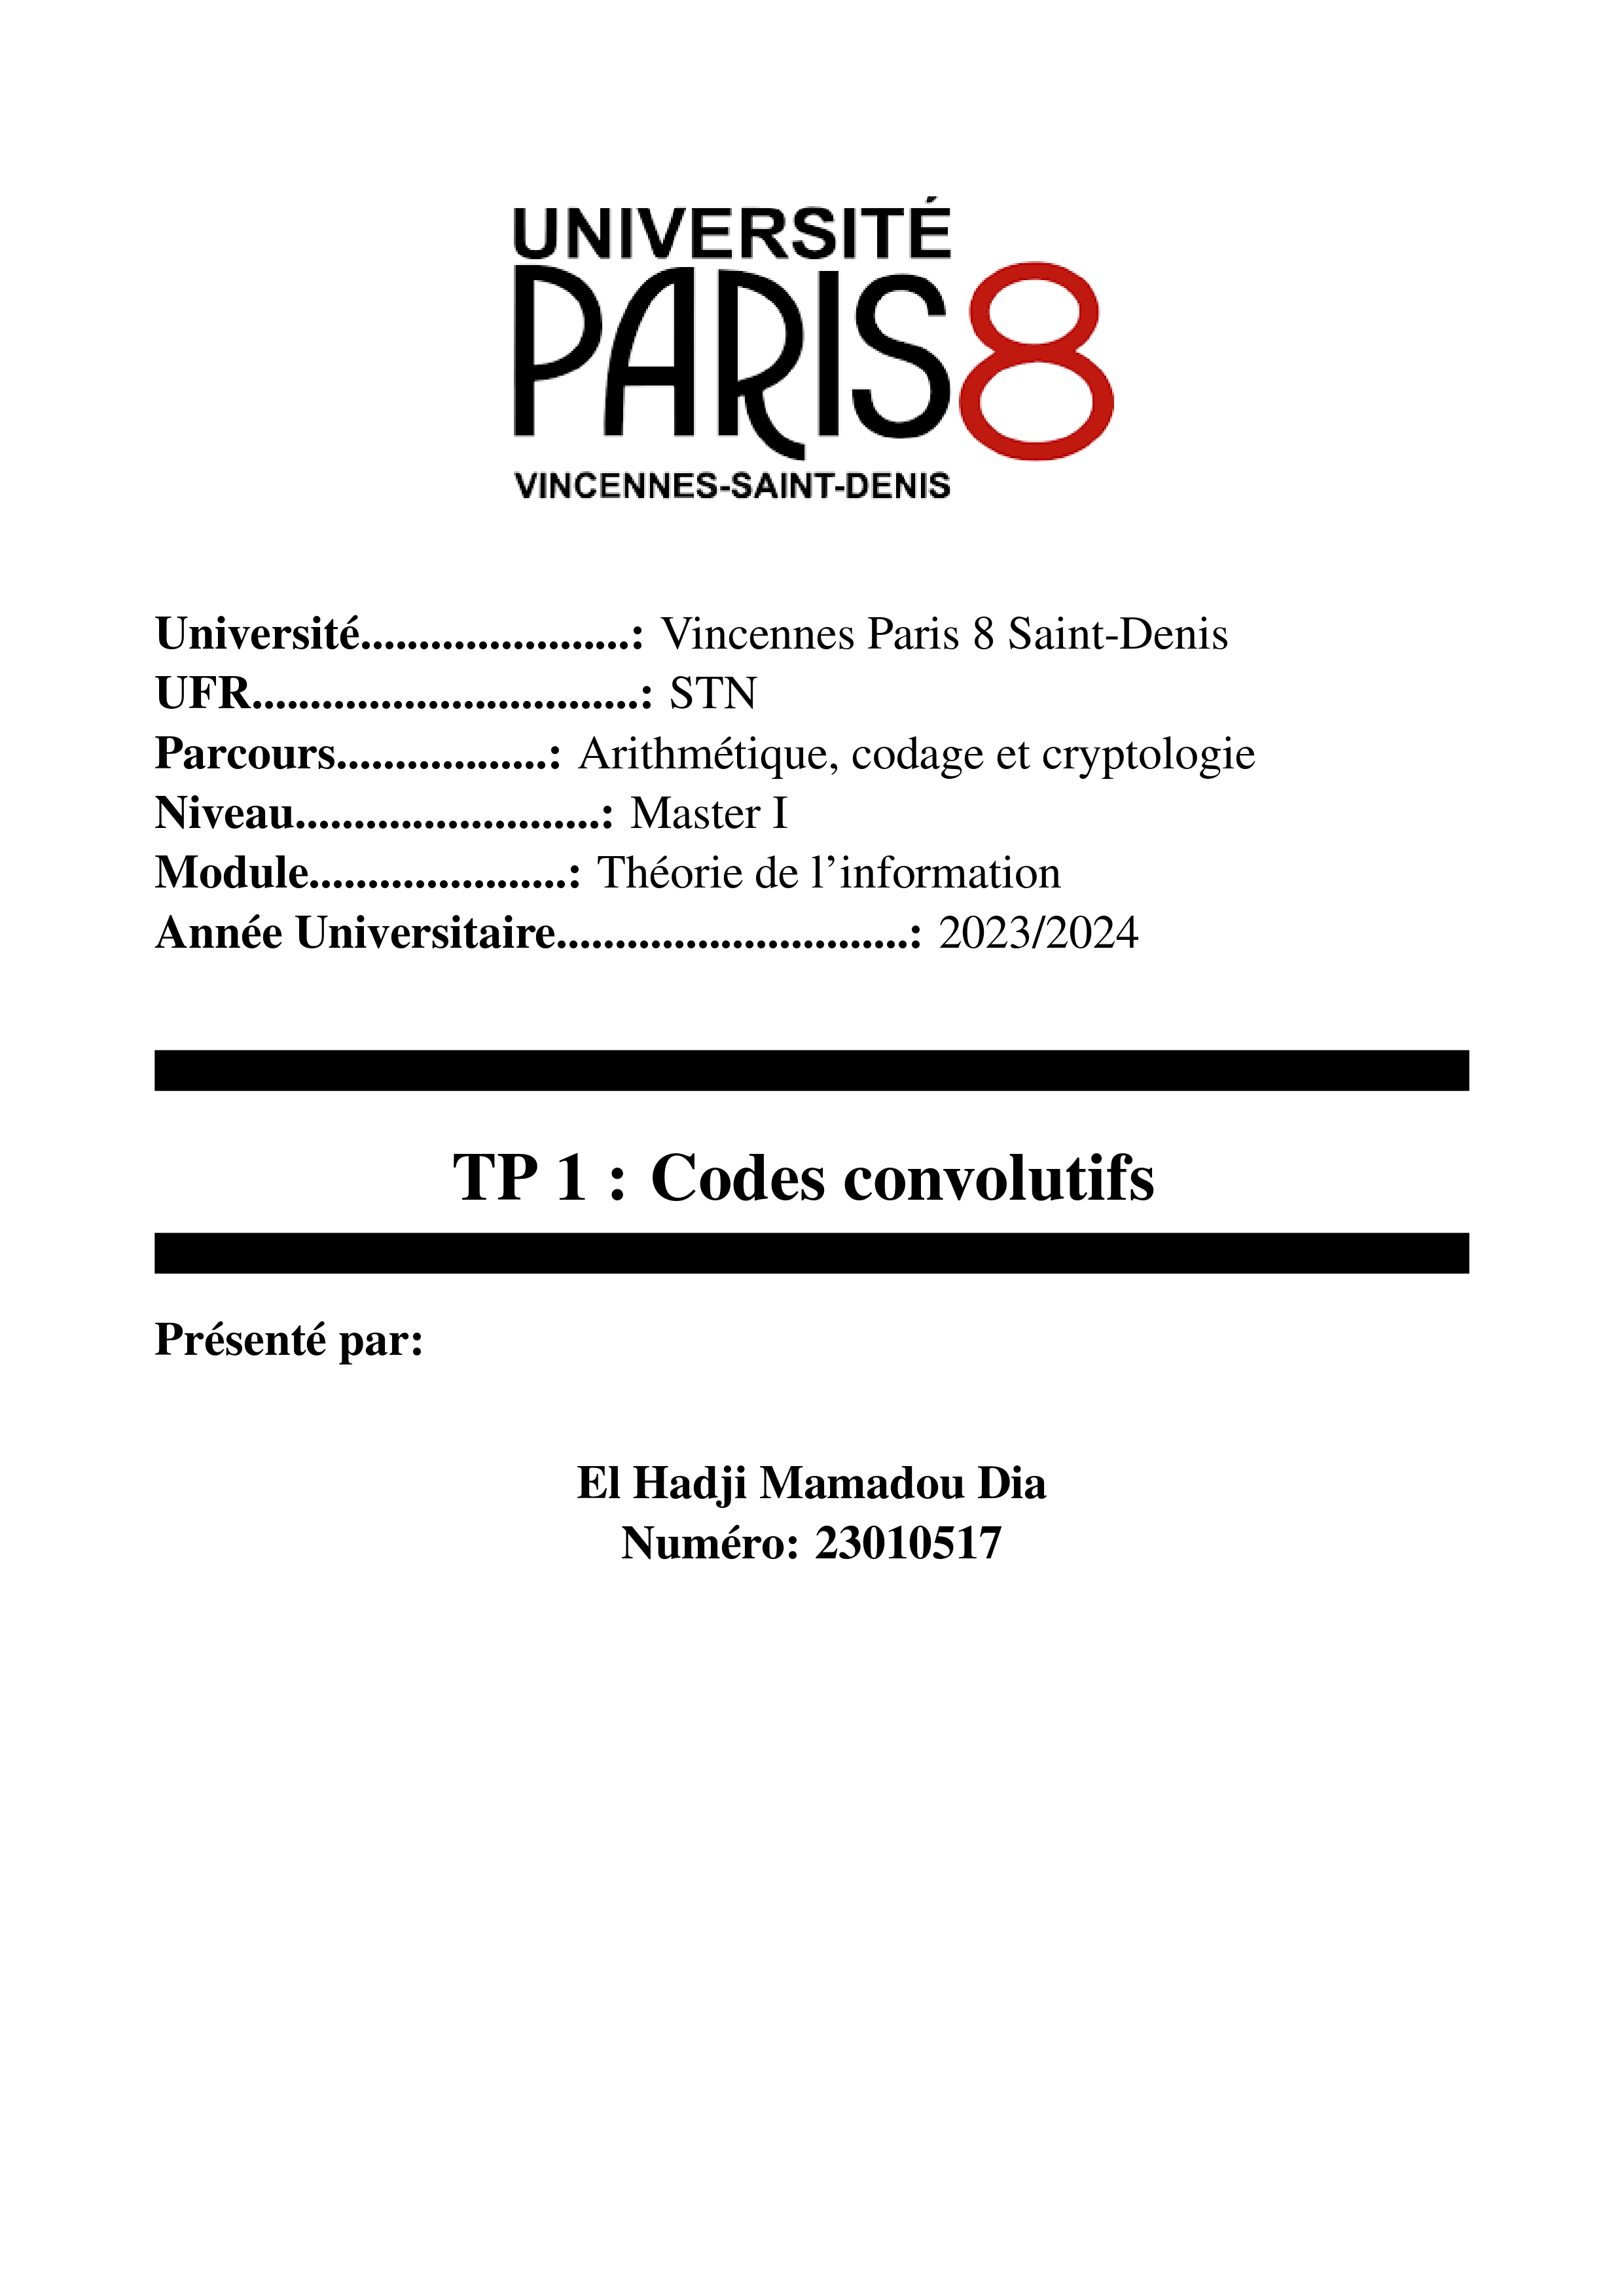

# -------------------------------------------------------------------------------------------------------
# ------------------------------ TP 1 : Codes convolutifs ------------------------------------
# -------------------------------------------------------------------------------------------------------

# %%%%%%% Partie 1 : encodage et décodage sans erreur %%%%%%%%

# ------------------- Question 1: L'algorithme de la fonction shift ----------------------

In [1]:
def shift(x, registre):
    long_registre = len(registre)
    registre.insert(0,x)
    registre.pop(-1)
    return registre

In [2]:
#Test

shift(1, [0, 1, 1, 1])

[1, 0, 1, 1]

# ------------- Question 2: L'algorithme de la fonction Comput_output --------------

In [3]:
def compute_output(registre, generator):
    long_registre = len(registre)
    sortie_registre = 0
    for i in range(0,long_registre):
        sortie_registre = (sortie_registre + registre[i] * generator[i])%2
    return sortie_registre

In [4]:
#Test

compute_output([0, 1, 1, 0], [1, 0, 1, 1])

1

# ---------- Question 3 : L'algorithme d'encodage d'un code convolutif -----------

In [5]:
def encode(message, generator):
    long_generator = len(generator)
    long_generator_0 = len(generator[0])
    long_message = len(message)
    C = [[] for i in range(long_generator)]
    R = [0 for i in range(long_generator_0)]
    len_generator = long_generator_0 - 1
    message = message + [0 for i in range(len_generator)]
    for i in range(0, long_message + long_generator_0 - 1):
        R = shift(message[i], R)
        for j in range(0, long_generator):
            c = compute_output(R, generator[j])
            C[j].append(c)
    return C

# ------------------------------------ Question 4: Teste ------------------------------------------

In [6]:
#Test1

encode([1], [ [1, 0, 1], [1, 1, 1] ])

[[1, 0, 1], [1, 1, 1]]

In [7]:
#Test2

encode([0, 1, 0, 1, 1, 1], [[1, 1, 0, 1], [1, 0, 1, 1]])

[[0, 1, 1, 1, 1, 0, 0, 1, 1], [0, 1, 0, 0, 0, 0, 0, 0, 1]]

# ----------------------------------------------------------------------------------------------------------Question 5: L'algorithme décodage d'un code convolutif avec un mot de code et un générateur 
# ----------------------------------------------------------------------------------------------------

In [8]:
def decodage(codeword, generator):
    long_codeword = len(codeword)
    long_generator = len(generator)
    long_message = long_codeword - long_generator + 1
    tampon = codeword[:]
    message = []
    for i in range(long_message):
        if tampon[i] == 1:
            for j in range(long_generator):
                tampon[i-j] = (tampon[i-j] + generator[long_generator - 1 - j])%2
            message.insert(0, 1)
        else:
            message.insert(0, 0)
    return message[:long_message]

In [9]:
#Test

decodage([1, 0, 1], [1, 0, 1])

[1]

## ------------------------------------------------------------------------------------------------------------------------------
# L'algorithme décodage d'un code convolutif avec un code composé de mot de code et un générateur
# ------------------------------------------------------------------------------------------------------------
# Nous avons appelé la décodage avec un mot de code pour construire cet algo
# ------------------------------------------------------------------------------------------------------------

In [10]:
def decodage_bis(codeword, generator):
    Long = len(codeword)
    message = []
    for i in range(Long):
        message += decodage(codeword[i], generator[i])
    return message[:len(codeword[0]) - len(generator[0]) + 1]

In [11]:
#Test1

decodage_bis([[0, 1, 1, 1, 1, 0, 0, 1, 1], [0, 1, 0, 0, 0, 0, 0, 0, 1]] , [[1, 0, 1], [1, 1, 1]])

[0, 0, 1, 1, 1, 1, 0]

In [12]:
#Test2

decodage_bis([[1, 0, 1], [1, 1, 1]] , [[1, 0, 1], [1, 1, 1]])

[1]

# -----------------------------------------------------------------------------------------------------------
# Question 6: L'algorithme qui montre que la fonction encode est l'inverse de la fonction décodage
# -----------------------------------------------------------------------------------------------------------

In [13]:
def test_foction(message, generator):
    resultat_encode = encode(message, generator)
    resultat_decode = decodage_bis(resultat_encode, generator)
    if resultat_decode == message:
        print("La fonction encode est l'inverse de la fonction décodage")
    else:
        print("Erreur: La fonction encode n'est pas l'inverse de la fonction décodage")

In [14]:
#Test

test_foction([1], [[1, 0, 1], [1, 1, 1]])

La fonction encode est l'inverse de la fonction décodage


# %%%%%%%%%%% Partie 2 : algorithme de Viterbi %%%%%%%%%%%%

# --------------------- Question 7: BSC : binary symmetric channel ----------------------

In [15]:
import random

def BSC(b, p):
    if random.random() < p:
        if b == 0:
            return 1 
        else:
            return 0
    else:
        return b

In [16]:
#Test

BSC(0, 0.1)

0

# -------------------------------------------------------------------------------------------------
# Question 8: Généralisation du canal binaire symétrique(BSC) avec un mot de code(codewords)
# -------------------------------------------------------------------------------------------------

In [17]:
def BSC_noise(codewords, p):
    long_codewords = len(codewords)
    codewords_false = []
    for i in range(0, long_codewords):
        codewords_false.append(BSC(codewords[i], p))
    return codewords_false

In [18]:
#Test

BSC_noise([1,0,1], 0.1)

[1, 0, 1]

# ---------------------------------- L'algorithme de hamming ---------------------------------------

In [19]:
def hamming(a, b, k):
    if len(a) != k or len(b) != k:
        raise ValueError("Erreur: Les listes a et b doivent être de même longueur k")
    dis_hamming = 0
    for i in range(0, k):
        if a[i] != b[i]:
            dis_hamming += 1
    return dis_hamming

In [20]:
#Test

hamming([1,0,1,0,1,1], [1,1,1,1,0,0], 6)

4

# ---------------------------------- L'algorithme binary_decomp ----------------------------------

In [21]:
def binary_decomp(t, k):
    return [ (t >> (k-1-i)) & 1 for i in range(k) ]

In [22]:
#Test

binary_decomp(12, 3)

[1, 0, 0]

# --------------------------------- L'algorithme de create_PREV ----------------------------------

In [23]:
def create_PREV(m):
    TAB = []
    mask = (1 << m) - 1
    for i in range(2**m):
        prev_0 = (i << 1) & mask
        prev_1 = (i << 1 ^ 1) & mask
        TAB.append([prev_0, prev_1])
    return TAB

In [24]:
#Test

create_PREV(3)

[[0, 1], [2, 3], [4, 5], [6, 7], [0, 1], [2, 3], [4, 5], [6, 7]]

# --------------------------------- L'algorithme de create_OUT ------------------------------------

In [25]:
def create_OUT(generators):
    k = len(generators)
    m = len(generators[0])
    r = m-1
    TAB = []
    for state in range(2**r):
        TAB.append([[],[]])
        for j in range(2):
            register = [j] + binary_decomp(state, r)
            for i in range(k):
                TAB[state][j].append(compute_output(register, generators[i]))
                
    return TAB

In [26]:
#Test

create_OUT([[1,1,0,1], [1,0,1,1]])

[[[0, 0], [1, 1]],
 [[1, 1], [0, 0]],
 [[0, 1], [1, 0]],
 [[1, 0], [0, 1]],
 [[1, 0], [0, 1]],
 [[0, 1], [1, 0]],
 [[1, 1], [0, 0]],
 [[0, 0], [1, 1]]]

# ------------------------- Question 9:  l'algorithme de Viterbi -------------------------------

In [27]:
def viterbi(codewords_false, generator):
    long_codewords_false = len(codewords_false)
    long_generator = len(generator)
    k = long_codewords_false
    r = len(generator[0]) - 1
    n = len(codewords_false[0]) - r + 1 
    N = n + r + 2
    PREV = create_PREV(r - 1)
    OUT = create_OUT(generator)
    INFTY = r*N + 1
    WEIGHT = [[INFTY for _ in range(N)] for _ in range(2**(r - 1))]
    WEIGHT[0][0] = 0
    TREE = [[-1 for _ in range(N)] for _ in range(2**(r - 1))]
    y = []
    b = []
    B = []
    for j in range(1, N):
        if j < n + r:
            y = [codewords_false[i][j - 1] for i in range(k)]
        else:
            y = [0]*k
        for state in range(2**(r - 1)):
            prev_0, prev_1 = PREV[state]
            b = state >> (r - 2)
            out_0 = OUT[prev_0][b]
            out_1 = OUT[prev_1][b]
            error_0 = WEIGHT[prev_0][j - 1] + hamming(out_0, y, k)
            error_1 = WEIGHT[prev_1][j - 1] + hamming(out_1, y, k)
            if error_0 > error_1:
                WEIGHT[state][j] = error_1
                TREE[state][j] = prev_1
            else:
                WEIGHT[state][j] = error_0
                TREE[state][j] = prev_0
    min_WEIGHT = min(WEIGHT[i][N-1] for i in range(2**(r-1)))
    if WEIGHT[0][N - 1] != min_WEIGHT:
        return "Erreur de décodage!!!"
    else: 
        m = []
        state = 0
        for j in range(N - 1, -1, -1):
            m.insert(0, state >> (r - 2))
            state = TREE[state][j]
    return m[:n]

In [28]:
#Test1

viterbi( [[1, 1, 0, 1, 0, 1],[1, 1, 0, 1, 1, 1]], [[1, 0, 1], [1, 1, 1]])

[0, 1, 0, 0, 1]

In [29]:
#Test2

viterbi( [[0, 1, 0, 0, 1, 0, 0, 1, 1],[1, 1, 0, 0, 0, 0, 0, 0, 1]], [[1, 0, 1, 1], [1, 1, 0, 1]])

[0, 1, 0, 1, 1, 1, 0]

# -------------------------------------------------------------------------------------------------------------
# L'agorithme de BSC_noise_Bis qui applique le canal binaire symétrique à chaque bit de chaque mot de code du code
# -------------------------------------------------------------------------------------------------------------

In [30]:
def BSC_noise_Bis(code, p):
    codewords_false = []
    for codeword in code:
        tampon = [BSC(bit, p) for bit in codeword]
        codewords_false.append(tampon)
    return codewords_false

In [31]:
#Test

BSC_noise_Bis([[1, 0, 1],[1, 1, 1]], 0.1)

[[1, 0, 1], [1, 1, 1]]

In [32]:
#Test3 de la fonction de Viterbi en utilisant des codes encodés pour corrompus aléatoirement avec notre fonction BSC_noise_Bis

Codeword_corrompu = BSC_noise_Bis([[0, 1, 1, 1, 1, 0, 0, 1, 1], [0, 1, 0, 0, 0, 0, 0, 0, 1]], 0.1)
viterbi(Codeword_corrompu, [[1, 1, 0, 1], [1, 0, 1, 1]])

[0, 0, 1, 1, 0, 1, 0]